In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
in_dir = 'data/'
in_file = 'ex6_ImagData2Load.mat'
data = sio.loadmat(in_dir + in_file)
ImgT1 = data['ImgT1']
ImgT2 = data['ImgT2']
ROI_GM = data['ROI_GM'].astype(bool)
ROI_WM = data['ROI_WM'].astype(bool)

# Exercise 1

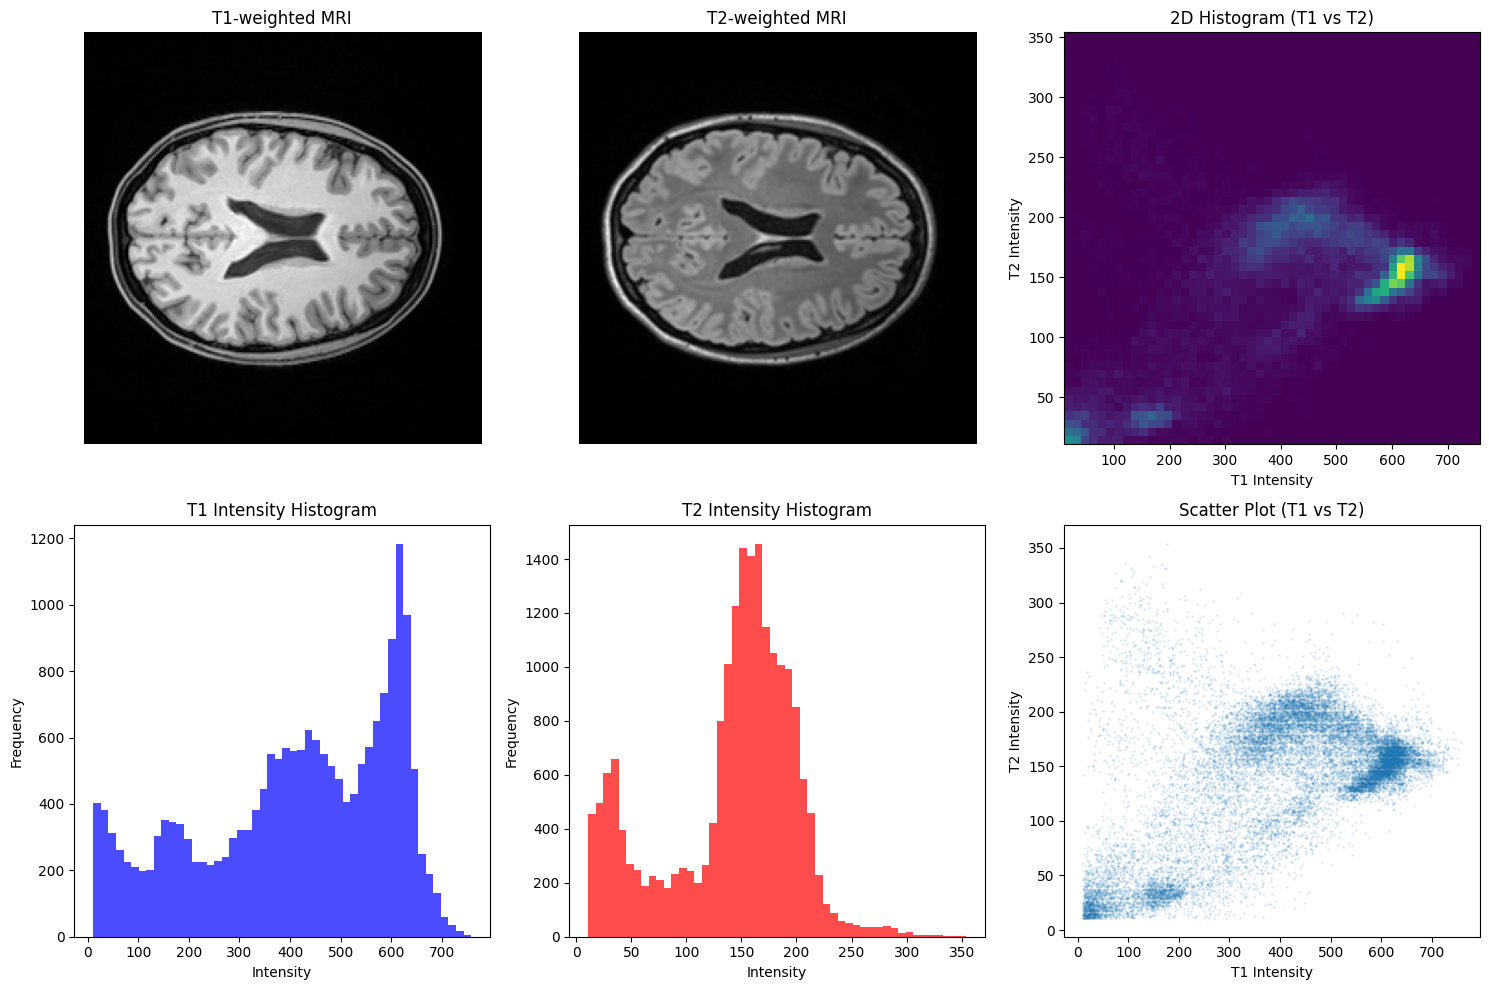

In [3]:
# Create a mask to exclude background (assuming background is 0)
mask = (ImgT1 > 10) & (ImgT2 > 10)

def visualize_mri_data(ImgT1, ImgT2):
    # Create figure with subplots
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Plot T1 Image
    axs[0, 0].imshow(ImgT1, cmap='gray')
    axs[0, 0].set_title('T1-weighted MRI')
    axs[0, 0].axis('off')
    
    # Plot T2 Image
    axs[0, 1].imshow(ImgT2, cmap='gray')
    axs[0, 1].set_title('T2-weighted MRI')
    axs[0, 1].axis('off')
    
    # 1D Histogram for T1
    axs[1, 0].hist(ImgT1[mask].flatten(), bins=50, color='blue', alpha=0.7)
    axs[1, 0].set_title('T1 Intensity Histogram')
    axs[1, 0].set_xlabel('Intensity')
    axs[1, 0].set_ylabel('Frequency')
    
    # 1D Histogram for T2
    axs[1, 1].hist(ImgT2[mask].flatten(), bins=50, color='red', alpha=0.7)
    axs[1, 1].set_title('T2 Intensity Histogram')
    axs[1, 1].set_xlabel('Intensity')
    axs[1, 1].set_ylabel('Frequency')
    
    # 2D Histogram
    axs[0, 2].hist2d(ImgT1[mask].flatten(), ImgT2[mask].flatten(), 
                     bins=50, cmap='viridis')
    axs[0, 2].set_title('2D Histogram (T1 vs T2)')
    axs[0, 2].set_xlabel('T1 Intensity')
    axs[0, 2].set_ylabel('T2 Intensity')
    
    # Scatter plot
    axs[1, 2].scatter(ImgT1[mask].flatten(), ImgT2[mask].flatten(), 
                      alpha=0.1, s=1)
    axs[1, 2].set_title('Scatter Plot (T1 vs T2)')
    axs[1, 2].set_xlabel('T1 Intensity')
    axs[1, 2].set_ylabel('T2 Intensity')
    
    plt.tight_layout()
    return fig

# Call the function
fig = visualize_mri_data(ImgT1, ImgT2)
plt.show()

Q1: Intensity of 250 would probably be pretty good

Q2: There are 2 noticeable clouds that are separated, so probably yes

# Exercise 2

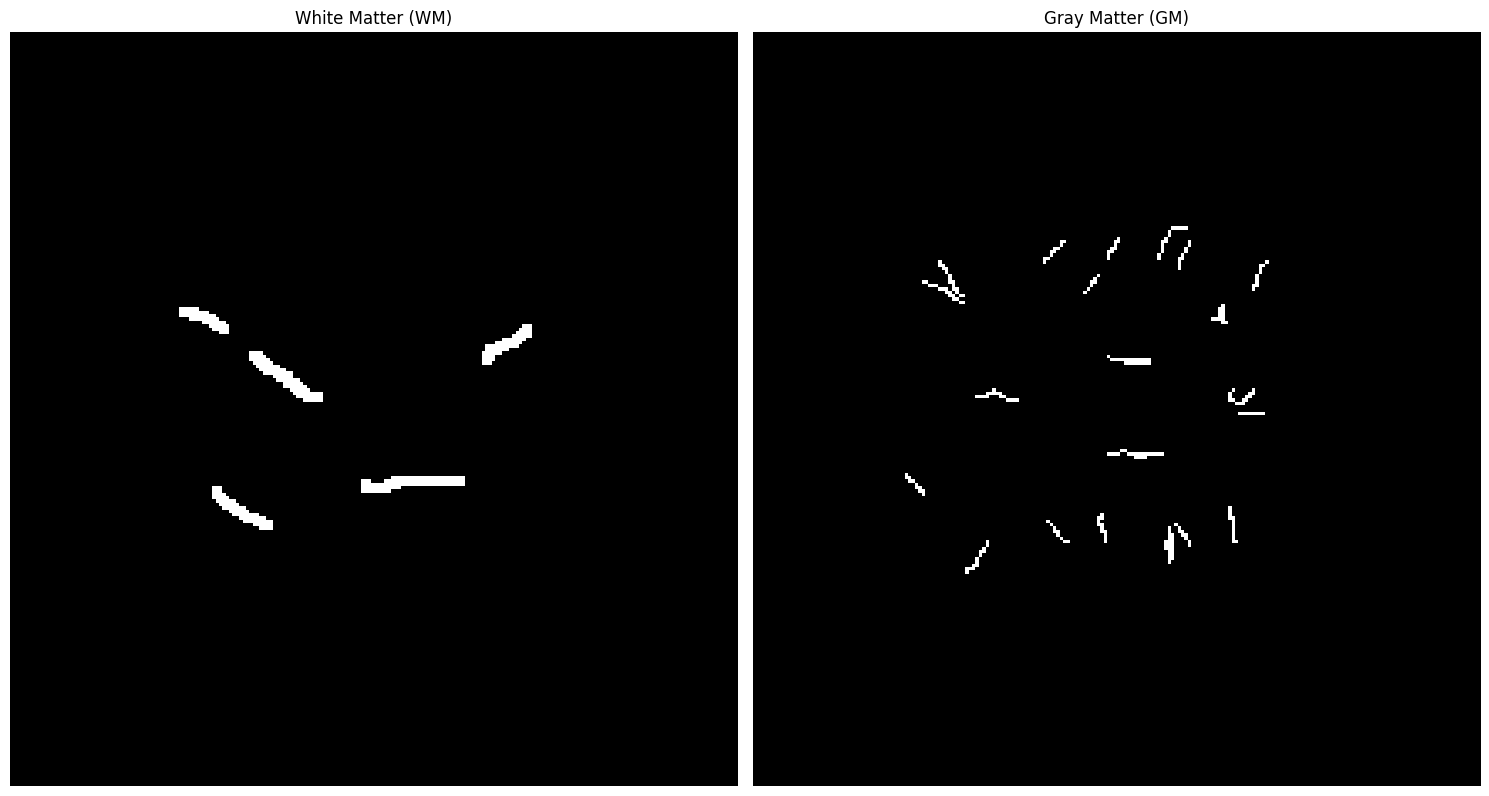

In [4]:
C1 = ROI_WM
C2 = ROI_GM

# Create figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Plot C1
axs[0].imshow(C1, cmap='gray')
axs[0].set_title('White Matter (WM)')
axs[0].axis('off')

# Plot C2
axs[1].imshow(C2, cmap='gray')
axs[1].set_title('Gray Matter (GM)')
axs[1].axis('off')

plt.tight_layout()
plt.show()

Q3: They look like small snakes

# Exercise 3

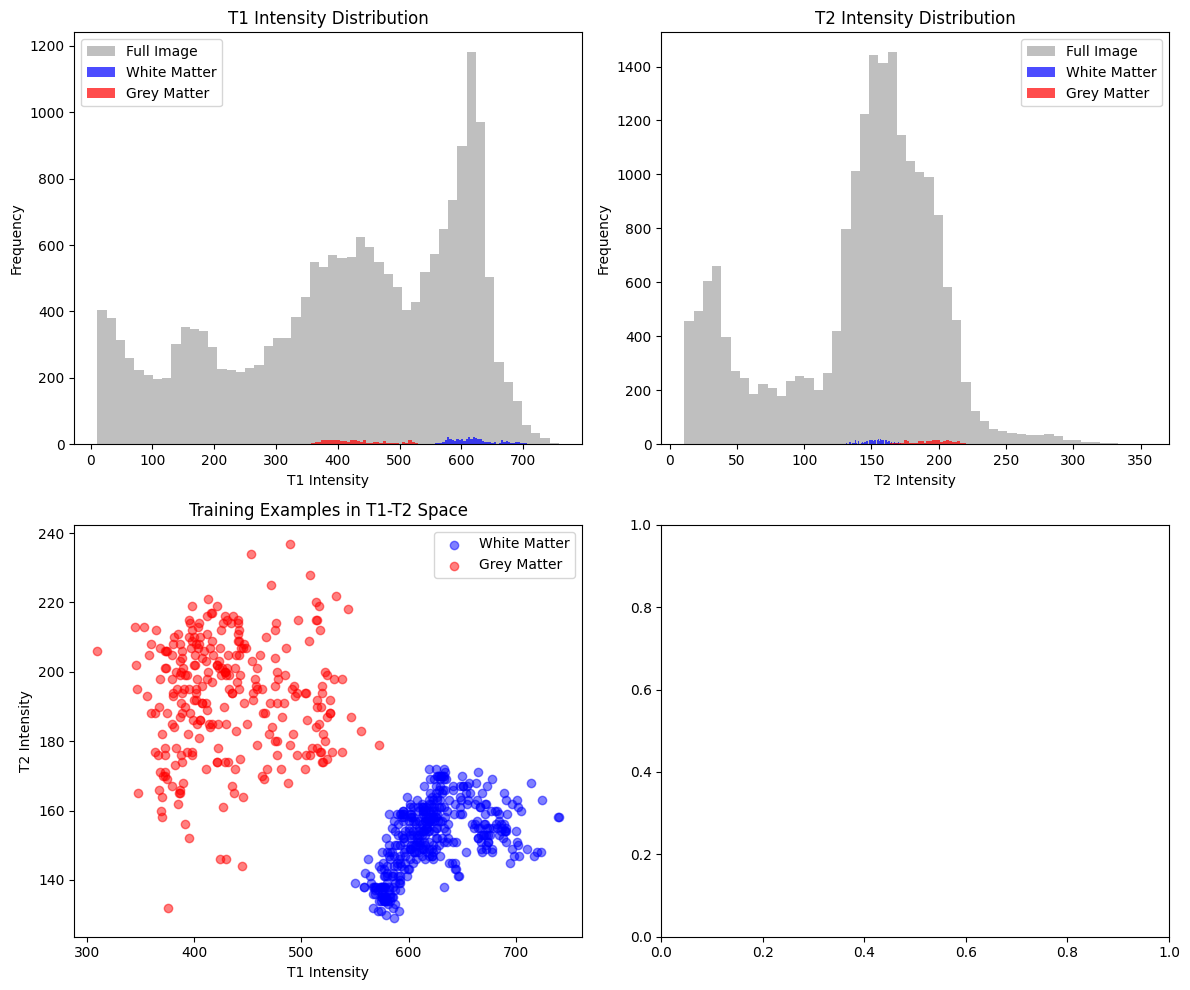

In [5]:
def extract_and_compare_training_data(ImgT1, ImgT2, ROI_WM, ROI_GM):
    # Get indices for training examples
    qC1 = np.argwhere(ROI_WM)  # Indices for White Matter
    qC2 = np.argwhere(ROI_GM)  # Indices for Grey Matter
    
    # Extract intensity values for training examples
    # For White Matter (C1)
    T1_C1 = ImgT1[qC1[:, 0], qC1[:, 1]]
    T2_C1 = ImgT2[qC1[:, 0], qC1[:, 1]]
    
    # For Grey Matter (C2)
    T1_C2 = ImgT1[qC2[:, 0], qC2[:, 1]]
    T2_C2 = ImgT2[qC2[:, 0], qC2[:, 1]]
    
    # Create figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # T1 histograms
    axs[0, 0].hist(ImgT1[mask].flatten(), bins=50, alpha=0.5, 
                   label='Full Image', color='gray')
    axs[0, 0].hist(T1_C1, bins=50, alpha=0.7, label='White Matter', color='blue')
    axs[0, 0].hist(T1_C2, bins=50, alpha=0.7, label='Grey Matter', color='red')
    axs[0, 0].set_title('T1 Intensity Distribution')
    axs[0, 0].set_xlabel('T1 Intensity')
    axs[0, 0].set_ylabel('Frequency')
    axs[0, 0].legend()
    
    # T2 histograms
    axs[0, 1].hist(ImgT2[mask].flatten(), bins=50, alpha=0.5, 
                   label='Full Image', color='gray')
    axs[0, 1].hist(T2_C1, bins=50, alpha=0.7, label='White Matter', color='blue')
    axs[0, 1].hist(T2_C2, bins=50, alpha=0.7, label='Grey Matter', color='red')
    axs[0, 1].set_title('T2 Intensity Distribution')
    axs[0, 1].set_xlabel('T2 Intensity')
    axs[0, 1].set_ylabel('Frequency')
    axs[0, 1].legend()
    
    # 2D scatter plot of training examples
    axs[1, 0].scatter(T1_C1, T2_C1, c='blue', label='White Matter', alpha=0.5)
    axs[1, 0].scatter(T1_C2, T2_C2, c='red', label='Grey Matter', alpha=0.5)
    axs[1, 0].set_title('Training Examples in T1-T2 Space')
    axs[1, 0].set_xlabel('T1 Intensity')
    axs[1, 0].set_ylabel('T2 Intensity')
    axs[1, 0].legend()
    
    # Return both extracted indices and training values for later use
    training_data = {
        'qC1': qC1,
        'qC2': qC2,
        'T1_C1': T1_C1,
        'T2_C1': T2_C1,
        'T1_C2': T1_C2,
        'T2_C2': T2_C2
    }
    
    plt.tight_layout()
    return fig, training_data

# Call the function
fig, training_data = extract_and_compare_training_data(ImgT1, ImgT2, ROI_WM, ROI_GM)
plt.show()

Q4: The intensities in T1 are higher for both ROI, than in T2

# Exercise 4

In [6]:
# Stack T1 and T2 intensities side by side for each class
WM_points = np.column_stack((ImgT1[ROI_WM], ImgT2[ROI_WM]))  # Class 1 points
GM_points = np.column_stack((ImgT1[ROI_GM], ImgT2[ROI_GM]))  # Class 2 points

# Combine both classes to create X (first WM, then GM)
X = np.vstack((WM_points, GM_points))

# Create target vector T (0 for WM, 1 for GM)
T = np.concatenate((np.zeros(len(WM_points)), np.ones(len(GM_points))))

# X will have shape (n_samples, 2) where each row is [T1_intensity, T2_intensity]
print("Shape of X:", X.shape)
print("Shape of T:", T.shape)

Shape of X: (679, 2)
Shape of T: (679,)


# Exercise 5

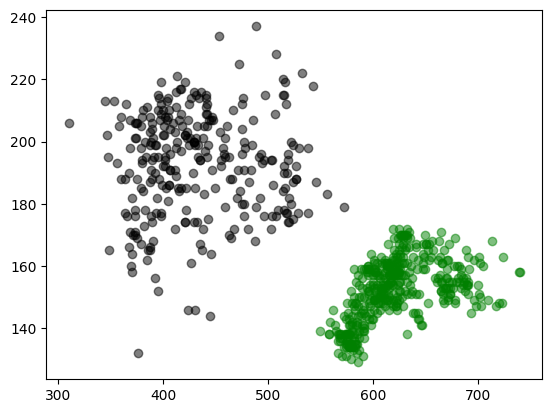

In [7]:
# Make a scatter plot of the training points of the two input features for class 1 and class 2 as green and black circles, respectively. Add relevant title and labels to axis
plt.scatter(X[T == 0, 0], X[T == 0, 1], c='green', label='White Matter', alpha=0.5)
plt.scatter(X[T == 1, 0], X[T == 1, 1], c='black', label='Gray Matter', alpha=0.5)

Q5: The separation is very clear, much better than 1D histogram

# Exercise 6

In [8]:
# Import LDA
from LDA import LDA
W = LDA(X, T)
W

array([[-138.11536977,    0.27566672,    0.68044071],
       [-131.32787698,    0.15900268,    0.99568003]])

# Exercise 7

In [9]:
Xall= np.c_[ImgT1.ravel(), ImgT2.ravel()]
Y = np.c_[np.ones((len(Xall), 1)), Xall] @ W.T

# Exercise 8

In [16]:
PosteriorProb = np.clip(np.exp(Y) / np.sum(np.exp(Y),1)[:, np.newaxis], 0, 1)
PosteriorProb

array([[0.00159784, 0.99840216],
       [0.00159784, 0.99840216],
       [0.00142215, 0.99857785],
       ...,
       [0.00159784, 0.99840216],
       [0.00159784, 0.99840216],
       [0.00112652, 0.99887348]])

# Exercise 9

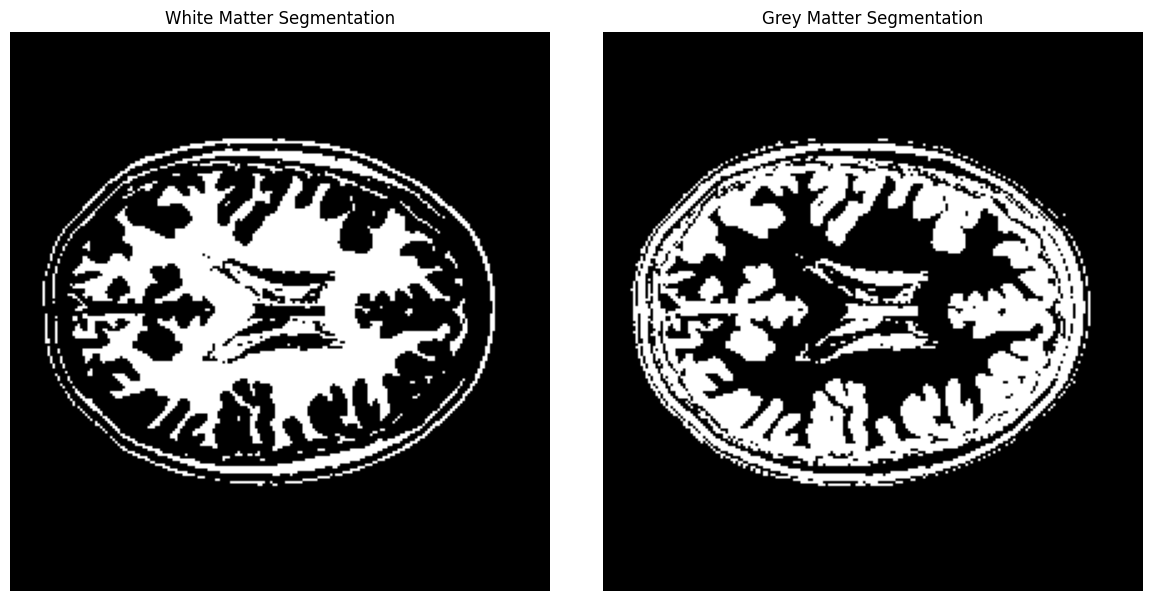

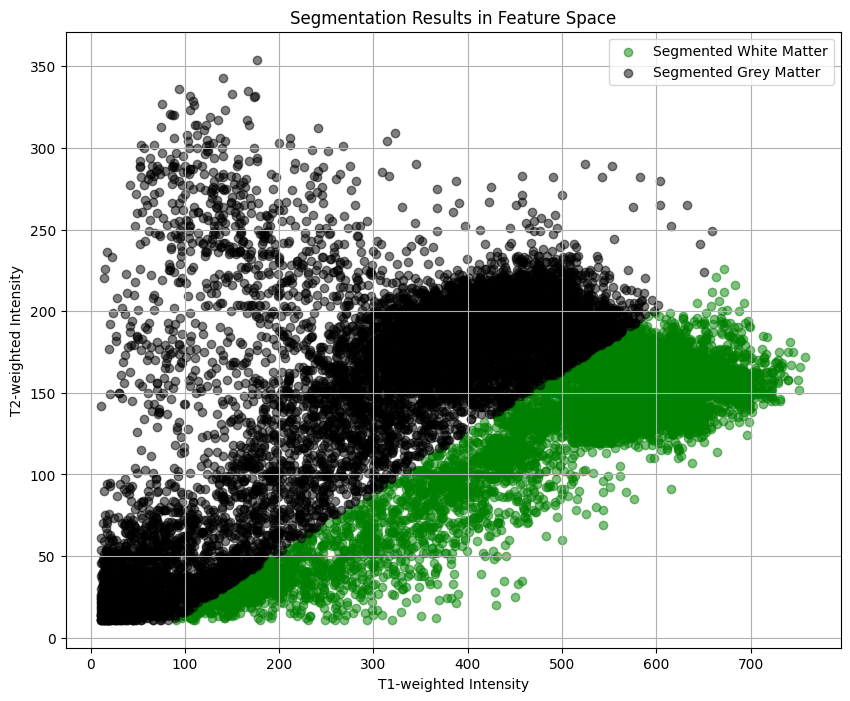

In [18]:
# Reshape the posterior probabilities to match the original image dimensions
posteriorC1 = np.zeros(ImgT1.shape)
posteriorC2 = np.zeros(ImgT1.shape)

# Calculate the probabilities only for non-background pixels
prob_reshape_C1 = PosteriorProb[:, 0].reshape(ImgT1.shape)
prob_reshape_C2 = PosteriorProb[:, 1].reshape(ImgT1.shape)

# Apply mask and threshold
segmentation_WM = (prob_reshape_C1 >= 0.5) & mask
segmentation_GM = (prob_reshape_C2 > 0.5) & mask

# Visualize the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(segmentation_WM, cmap='gray')
axs[0].set_title('White Matter Segmentation')
axs[0].axis('off')

axs[1].imshow(segmentation_GM, cmap='gray')
axs[1].set_title('Grey Matter Segmentation')
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Optional: Plot scatter plot of segmentation results
plt.figure(figsize=(10, 8))
plt.scatter(ImgT1[segmentation_WM], ImgT2[segmentation_WM], 
           c='green', label='Segmented White Matter', alpha=0.5)
plt.scatter(ImgT1[segmentation_GM], ImgT2[segmentation_GM], 
           c='black', label='Segmented Grey Matter', alpha=0.5)
plt.xlabel('T1-weighted Intensity')
plt.ylabel('T2-weighted Intensity')
plt.title('Segmentation Results in Feature Space')
plt.legend()
plt.grid(True)
plt.show()